In [171]:
import pandas as pd
import numpy as np

In [172]:
# import data from csv file, set it up as a Pandas data table
path = 'Data Points for Practice - Data.csv' 
data = pd.read_csv(path)
data.head(5) # forget unnamed for now

,Teacher Gender Male?,Student Gender Male?,Teacher same as student gender?,Morning class?,High School Year,6. How old are you?,Grade in Class,GPA,Absences,Standards Based Grading Used?,...,34. How much homework does your English teacher give you?,Is student allowed to eat food?,36. Does your teacher provide students with snacks?,37. How is the temperature of the room most of the time?,38. How often do you read books outside of class? (comics included),39. Do one of your parents/guardians have a degree?,"40. Are you the youngest, middle, or oldest sibling in your family?",41. What is your current level of happiness in general?,Student Hours of sleep,43. What statement best describes your family's income?
0,1,0,0,1,3,16,90.62%,4.000,7,1,...,"A lot, I can barely keep up.",0,Rarely,A little chilly,I rarely read books,Both parents/guardians have a degree,I'm the oldest,I am happy most of the time,7,"Our income covers our needs and a little more,..."
1,1,0,0,1,3,17,84.78%,3.769,4,1,...,"A decent amount, I don't struggle to stay on t...",1,Rarely,Ideal temperature,I never read books,Both parents/guardians have a degree,I'm the oldest,I have my ups and downs,7,"Our income covers our needs and more, I don't ..."
2,1,0,0,1,3,16,94.79%,4.000,4,1,...,"A decent amount, I don't struggle to stay on t...",1,Never,A little chilly,I read books every now and then,Both parents/guardians have a degree,I'm the oldest,I have my ups and downs,7,"Our income covers our needs and more, I don't ..."
3,1,1,1,1,3,16,94.13%,4.000,8,1,...,"A decent amount, I don't struggle to stay on t...",1,Rarely,Ideal temperature,I read frequently in my free time,Both parents/guardians have a degree,I'm the youngest,I feel down a decent amount of time,6,"Our income covers our needs and more, I don't ..."
4,1,0,0,1,3,16,72.62%,3.250,10,1,...,"A decent amount, I don't struggle to stay on t...",1,Rarely,A little chilly,I read frequently in my free time,Both parents/guardians have a degree,I'm the oldest,I am happy most of the time,6,"Our income covers our needs, but budgeting sto..."


In [197]:
features = data.columns.drop('Grade in Class')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_features = data.select_dtypes(include=numerics).columns # list of column names that are numerical
categorical_features = features.drop(numerical_features) # list of column names that are categorical
#classification_features = features.drop('')

In [198]:
# setup X and y data
# Note that X is the features and y is the target we want to predict

X = data.drop('Grade in Class', axis=1)
y = data['Grade in Class'].str.rstrip('%').astype('float')

# setup test split, model randomly chooses students to predict their grade
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [222]:
# pipeline
#setup pipe
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# imputers take care of missing values incase any aren't there
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
])

cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # was handle_unknown='ignore'
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, numerical_features),
    ('cat_processor', cat_processor, categorical_features,)
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('forest', RandomForestRegressor())
])


In [223]:
pipe.fit(X_train,y_train)

c:\Users\Derrick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('feature_processor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_processor',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                       

In [224]:
# setup RandomForestRegressor, we use this to predict student grades
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [225]:
# Setup for a grid search, we use a search grid to test multiple parameters and find the best one
from sklearn.model_selection import GridSearchCV
depth_list = [2,4,8,16,32]
param_dic = {}
# additionally, clf above has class_weight = 'balanced' in the parameters

grid = GridSearchCV(pipe,param_dic, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
c:\Users\Derrick\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('feature_processor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_processor',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True

In [226]:
# from the grid search, select the best one then make predictions from it
best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test) # from the people being tested, predict their grades


In [231]:
# from the best pipe, give the importances of the features given
# TODO: for some reason the feature importances list is longer than the features taken in
# TODO: link for above stuff here https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
estimator_values = grid.best_estimator_.named_steps["forest"].feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]
print('length of feature importances:', len(estimator_values))
print('length of features taken in', len(feature_names))
# estimators = pd.DataFrame(data = estimator_values, index=[numerical_features, categorical_features], columns=['index', 'value'])


length of feature importances: 95
length of features taken in 42


In [ ]:
# print a list of grades predicted
np.floor(y_test_pred).tolist()

[78.0, 78.0, 93.0, 83.0, 73.0, 73.0, 90.0, 80.0]

In [ ]:
# print a list of the actual grades
y_test.values

array([76.25, 84.27, 94.79, 84.78, 93.29, 83.73, 75.92, 87.73])

In [206]:
# print predicted and actual grades side by side
testLength = len(y_test)
for i in range(testLength):
    print('predicted grade: ', np.floor(y_test_pred[i]), 'actual grade: ', y_test.values[i])

predicted grade:  83.0 actual grade:  60.91
predicted grade:  88.0 actual grade:  93.96
predicted grade:  84.0 actual grade:  69.33
predicted grade:  87.0 actual grade:  84.27
predicted grade:  81.0 actual grade:  72.62
predicted grade:  93.0 actual grade:  94.79
predicted grade:  93.0 actual grade:  88.98
predicted grade:  83.0 actual grade:  93.29


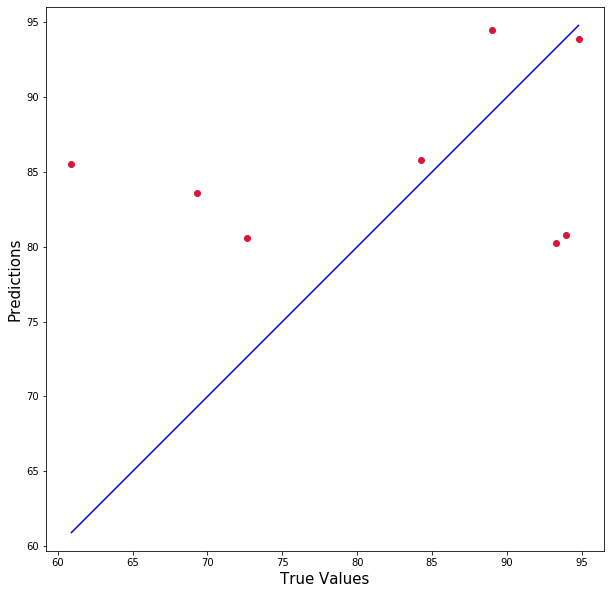

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)


# plot from SOF https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [233]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, mean_absolute_error, mean_squared_error

def TestPipe(y,y_pred):
    print('params:',grid.best_params_)
    # MSE
    print('MSE:',np.sqrt(mean_squared_error(y,y_pred)))
    # MAE
    print('MAE:',mean_absolute_error(y,y_pred))
    # MAPE
    # not using cause its missing in my python version
    #print('MAPE', mean_absolute_percentage_error(y,y_pred))

TestPipe(y_test,y_test_pred)

params: {}
MSE: 12.501488251404309
MAE: 10.131499999999999


AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

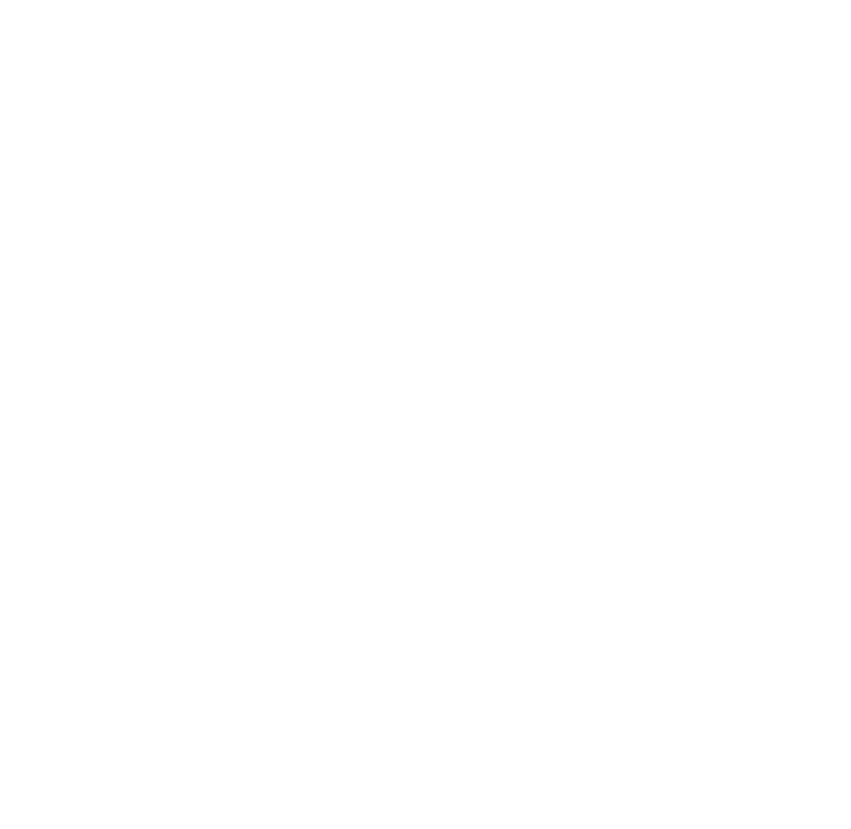

In [180]:
# DONT USDFS  XD
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(best_pipe.named_steps['forest'],
         #feature_names = X_test.columns,
         #class_names = best_pipe.named_steps['forest'].classes_,
         filled = True,
         fontsize=15)
plt.show()